In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import power_transform
import re
import statsmodels.api as smf
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_selection import RFE

In [153]:
df = pd.read_csv('autos.csv',header=0,encoding='iso8859_2')

df['seller'].value_counts()
# mazu nepotrebne sloupce - nazev inzeratu, datum stazeni, pocet fotek = vzdy 0
# druheho typu je tak malo ze to nema smysl resit
df = df.drop(['name','dateCrawled','nrOfPictures','seller',"dateCreated","postalCode", "lastSeen"],axis=1)
df

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


### Data anomaly detection

#### Year of registration

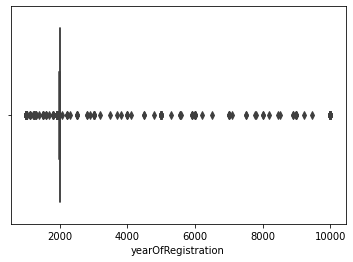

In [154]:
sns.boxplot(x=df['yearOfRegistration'])

In [155]:
df = df[df['yearOfRegistration'] > 1950]
df = df[df['yearOfRegistration'] < 2020]

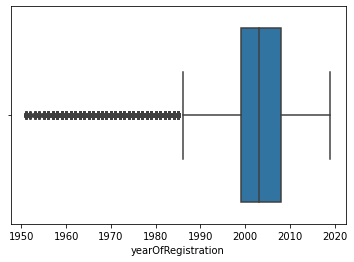

In [156]:
sns.boxplot(x=df['yearOfRegistration'])

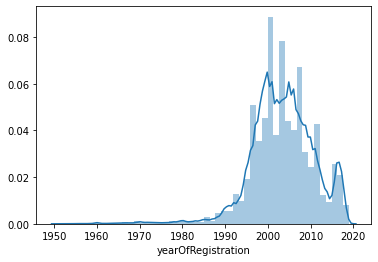

In [157]:
sns.distplot(df['yearOfRegistration'], kde=True);

In [158]:
df['yearOfRegistration'] = power_transform(df['yearOfRegistration'].values.reshape(-1, 1), method='box-cox')

/home/peter/.local/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/peter/.local/lib/python3.6/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


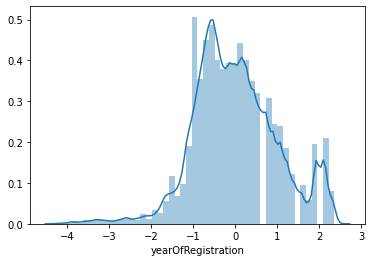

In [159]:
sns.distplot(df['yearOfRegistration'], kde=True);

##### Price

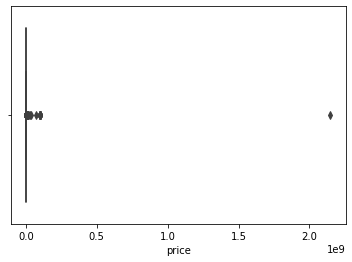

In [160]:
sns.boxplot(x=df['price'])

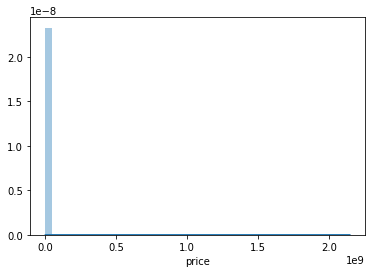

In [161]:
sns.distplot(df['price'], kde=True);

In [162]:
df = df[df['price'] < 50000]
df = df[df['price'] > 0]

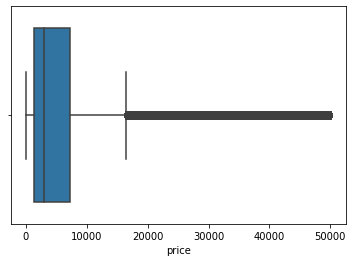

In [163]:
sns.boxplot(x=df['price'])

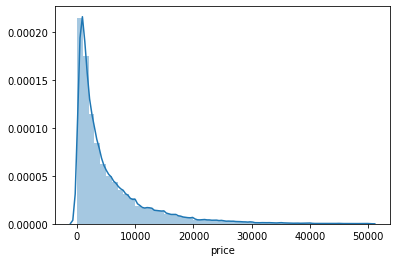

In [164]:
sns.distplot(df['price'], kde=True);

In [165]:
df['price'] = power_transform(df['price'].values.reshape(-1, 1), method='box-cox')

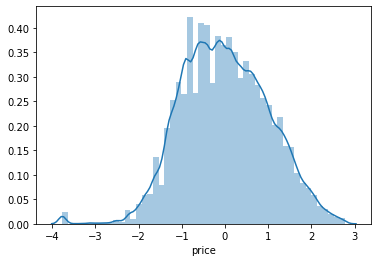

In [166]:
sns.distplot(df['price'], kde=True);

###### Power PS

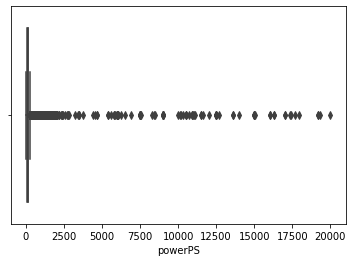

In [167]:
sns.boxplot(x=df['powerPS'])

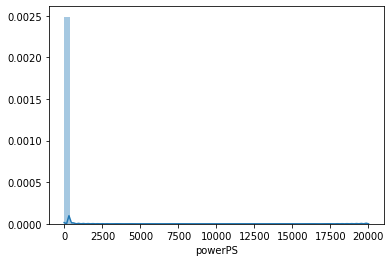

In [168]:
sns.distplot(df['powerPS'], kde=True);

In [169]:
df = df[df['powerPS'] < 500]
df = df[df['powerPS'] > 0]

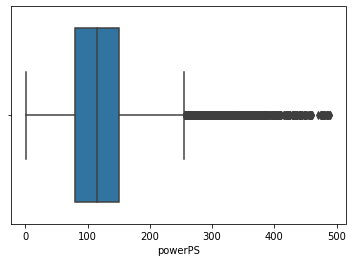

In [170]:
sns.boxplot(x=df['powerPS'])

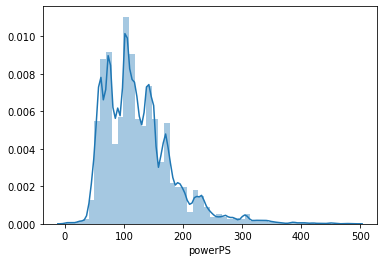

In [171]:
sns.distplot(df['powerPS'], kde=True);

In [172]:
df['powerPS'] = power_transform(df['powerPS'].values.reshape(-1, 1), method='box-cox')

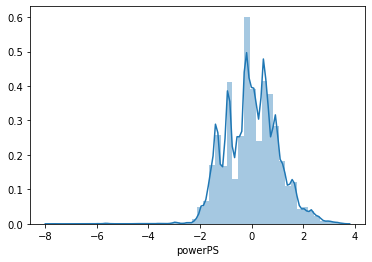

In [173]:
sns.distplot(df['powerPS'], kde=True);

##### Kilometer

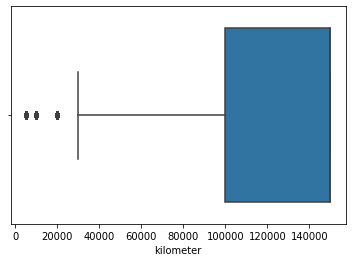

In [174]:
sns.boxplot(x=df['kilometer'])

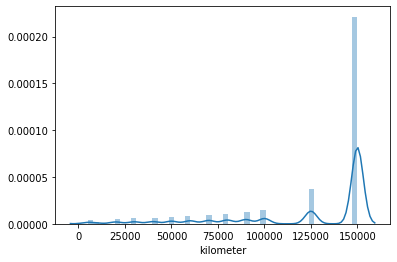

In [175]:
sns.distplot(df['kilometer'], kde=True);

In [176]:
df['kilometer'][df['kilometer'] == 0] = df['kilometer'][df['kilometer'] == 0] + 1

/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [177]:
df['kilometer'] = power_transform(df['kilometer'].values.reshape(-1, 1), method='box-cox')

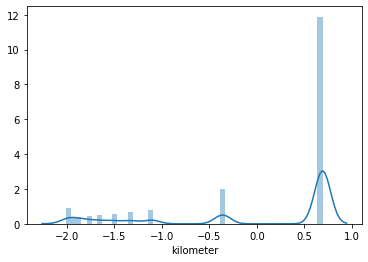

In [178]:
sns.distplot(df['kilometer'], kde=True);

##### Month Of registration

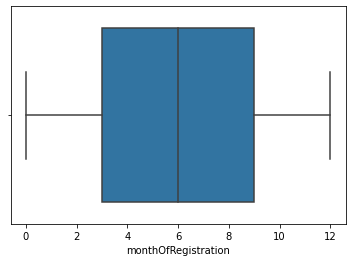

In [179]:
sns.boxplot(x=df['monthOfRegistration'])

In [180]:
df = df[df['monthOfRegistration'] > 0]

## Further data preprocessing

In [181]:
def numerizeClass(column):
    unq = df[column].dropna().unique()
    #Zmenil som 0 na 1
    cnt = 1
    for u in unq:
        # idx = df[df[column] == u].index.tolist()
        df[column].replace(u,cnt, inplace = True)
        # print(df[column])
        cnt +=1

In [182]:
nonnumericColumns = list(df.select_dtypes(include=['object']).columns)
dateColumns = [c for c in nonnumericColumns if re.match('date|month|lastSeen',c)]
groups = set(nonnumericColumns) -  set(dateColumns)
# print(groups)
# integer encoding
for g in list(groups):
    numerizeClass(g)

# 2016-03-24 11:52:17
for c in dateColumns:
    # df[c].str.replace("-","").astype(int)
    # df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m%d")
    df[c] = pd.to_datetime(df[c])
df.head()

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,1,1.623850,1,1.0,1.060746,1.0,1.162293,NaN,-0.359337,5,1.0,1,1.0
2,1,0.986802,1,2.0,-0.001838,2.0,0.804289,1.0,-0.359337,8,1.0,2,NaN
3,1,-0.594736,1,3.0,-0.407965,1.0,-0.900760,2.0,0.692213,6,2.0,3,2.0
4,1,0.085877,1,3.0,0.584609,1.0,-1.073643,3.0,-1.329555,7,1.0,4,2.0
5,1,-1.163903,1,4.0,-1.141482,1.0,-0.246374,4.0,0.692213,10,2.0,5,1.0


In [183]:
#mazu radky obsahujici nan
df.isnull().sum()
df.dropna(inplace=True)
# print(df.shape)

In [184]:
df = df.drop(['offerType'], axis=1)

In [185]:
#vyhadzujem jeden typ vozidla. Len 1502 kusov. Druhy najmensi ma 11404,treti 13488
df = df.groupby('vehicleType').filter(lambda x : len(x)>2000)

In [186]:
df = df.groupby('model').filter(lambda x : len(x)>100)

In [187]:
df = df.groupby('fuelType').filter(lambda x : len(x)>1000)

In [188]:
df = df.groupby('brand').filter(lambda x : len(x)>1000)

In [189]:
columns = ['abtest', 'vehicleType', 'gearbox', 'model', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage']

In [190]:
for c in columns:
    df[c] = power_transform(df[c].values.reshape(-1, 1), method='box-cox')

In [191]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(df[['price','abtest','vehicleType','yearOfRegistration','gearbox','powerPS','model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage']]),
                      columns=['price','abtest','vehicleType','yearOfRegistration','gearbox','powerPS','model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage'],
                      index=df.index)
scaled.head()
clean_df = df.copy(deep=True)
clean_df[['price','abtest','vehicleType','yearOfRegistration','gearbox','powerPS','model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage']] = scaled[['price','abtest','vehicleType','yearOfRegistration','gearbox','powerPS','model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage']]


In [192]:
X = clean_df.drop("price",1) 
y = df["price"]  
X_1 = smf.add_constant(X)
regressor_ols = smf.OLS(y,X_1).fit()

In [193]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = smf.add_constant(X_1)
    model = smf.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
selected_features_BE

['vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage']

In [194]:
#no of features
nof_list=np.arange(1,11)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = linear_model.LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

/home/peter/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/peter/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/peter/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/peter/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/peter/.local/lib/python3.6/site-packages/sklearn/u

Optimum number of features: 8
Score with 8 features: 0.736422


/home/peter/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [195]:
cols = list(X.columns)
model = linear_model.LinearRegression()
#Initializing RFE model
rfe = RFE(model, 9)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

/home/peter/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Index(['vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')


In [196]:
X = df[selected_features_BE]

In [197]:
y = df['price']

In [199]:
X.to_csv('X.csv')
y.to_csv('y.csv')